In [1]:
import os
cwd = os.getcwd()
os.chdir("C:\\Users\\Alex\\pyroblox")
import requests

session = requests.Session()
session.params = {}


os.chdir(cwd)

In [52]:
class friends(object):
    def __init__(self, id):
        self.id = id
    def info(self):
        path = 'https://friends.roblox.com/v1/users/{}/friends'.format(self.id)
        response = session.get(path)
        return response.json()

class users(object):
    def __init__(self, id):
        self.id = id
    def info(self):
        path = 'https://users.roblox.com/v1/users/{}'.format(self.id)
        response = session.get(path)
        return response.json()
class groups(object):
    def __init__(self, id):
        self.id = id
    def allies(self):
        path = "https://groups.roblox.com/v1/groups/{}/relationships/Allies?model.startRowIndex=0&model.maxRows=100000".format(self.id)
        response = session.get(path)
        return response.json()
    def enemies(self):
        path = "https://groups.roblox.com/v1/groups/{}/relationships/Enemies?model.startRowIndex=0&model.maxRows=100000".format(self.id)
        response = session.get(path)
        return response.json()
    def user_list(self):
        path = "https://groups.roblox.com/v1/groups/{}/users?sortOrder=Asc&limit=10".format(self.id)
        response = session.get(path)
        return response.json()
    def info(self):
        path = "https://groups.roblox.com/v1/groups/{}".format(self.id)
        response = session.get(path)
        return response.json()
    
def user_info(id):
    user_instance = users(id)
    response = user_instance.info()
    return([id] + list(response.values()))

def group_info(id):
    group_instance = groups(id)
    response = group_instance.info()
    return(list(response.values()))

In [21]:
friends_instance = friends(197098277)
response = friends_instance.info()


In [24]:
import time
def edgelist(id):
    friends_instance = friends(id)
    response = friends_instance.info()
    outer_list = response['data']
    l = []
    new_ids = []
    for i in outer_list:
        new_ids.append(i['id'])
        l.append([id, i['id']])
    for i in new_ids:
        try:
            new_friends_instance = friends(i)

            new_response = new_friends_instance.info()
            print(i)
            new_outer_list = new_response['data']
            for j in new_outer_list:
                l.append([i, j['id']])
        except:
             time.sleep(60)
            
    return l
el1 = edgelist(358857858)

149338049
360553797
366323043
359404819
331759517
339894859
325576457
348909401
294015278
39592320
362414280
363743337
237679094
349119861
363944148
364803734
333795071
358536610
186295359
164433109
210214141
319883784
154099523
314735423
292670656
198702567
351351269
358634452
342079913


In [40]:
groups_instance = groups(5351020)
resp_allies = groups_instance.allies()
ally_list = resp_allies['relatedGroups']

In [44]:
def group_edgelist(id):
    groups_instance = groups(id)
    resp_allies = groups_instance.allies()
    ally_list = resp_allies['relatedGroups']
    ally_net = []
    new_ids = []
    for i in ally_list:
        new_ids.append(i['id'])
        ally_net.append([id, i['id']])
    for i in new_ids:
        try:
            new_groups_instance = groups(i)

            new_resp_allies = new_groups_instance.allies()
            #print(i)
            new_outer_list = new_resp_allies['relatedGroups']
            for j in new_outer_list:
                ally_net.append([i, j['id']])
        except:
             time.sleep(60)
            
    
    resp_enemies = groups_instance.enemies()
    enemy_list = resp_enemies['relatedGroups']
    enemy_net = []
    enemy_ids = []
    for i in enemy_list:
        enemy_ids.append(i['id'])
        enemy_net.append([id, i['id']])
    for i in enemy_ids:
        try:
            new_groups_instance = groups(i)

            new_resp_enemies = new_groups_instance.enemies()
            #print(i)
            new_outer_list = new_resp_enemies['relatedGroups']
            for j in new_outer_list:
                enemy_net.append([i, j['id']])
        except:
             time.sleep(60)
    d = dict()
    d['allies'] = ally_net
    d['enemies'] = enemy_net
    return d
    

In [45]:
group_net = group_edgelist(5351020)

In [49]:
allies_df = pd.DataFrame(group_net['allies'], columns =['From', 'To'])

In [50]:
enemies_df = pd.DataFrame(group_net['enemies'], columns = ['From', 'To'])

In [51]:
group_ids = set(list(allies_df['To']) + list(allies_df['From']) + list(enemies_df["To"]) + list(enemies_df["From"]))

In [57]:
big_list = []
for i in list(group_ids):
    try:
        big_list.append(group_info(i))
    except:
        time.sleep(600)

In [58]:
groups_df_rich = pd.DataFrame(big_list, columns=["id", "name", "description", "owner", "shout", "memberCount", "isBuildersClubOnly", "publicEntryAllowed", "isLocked"])

In [59]:
groups_df_rich

,id,name,description,owner,shout,memberCount,isBuildersClubOnly,publicEntryAllowed,isLocked
0,5215747,Best Games of Robloxia,test,"{'buildersClubMembershipType': 'None', 'userId...","{'body': '', 'poster': {'buildersClubMembershi...",369,False,False,None
1,4074505,ANTIFASCHISTISCHE AKTION - Robloxians Against ...,ANTIFASCHISTISCHE AKTION - Robloxians Against ...,"{'buildersClubMembershipType': 'None', 'userId...",{'body': 'Buy our uniform from the group store...,1,False,False,None
2,2729482,[ - The First Order - ],The only and ultimate authority to the Galaxy....,"{'buildersClubMembershipType': 'None', 'userId...",None,8832,False,True,None
3,4968985,The Intertraponal Brigades,real official patriot imperium special forces,"{'buildersClubMembershipType': 'None', 'userId...","{'body': 'Official PI special forces', 'poster...",8,False,True,None
4,8508450,Dressman,Dressman on miesten muotivaateketju joka katta...,"{'buildersClubMembershipType': 'None', 'userId...","{'body': 'Hi! This group is so nice!', 'poster...",32,False,False,None
...,...,...,...,...,...,...,...,...,...
118,8968690,metamafia,,"{'buildersClubMembershipType': 'None', 'userId...",None,118,False,True,None
119,6119411,The 9th International,,"{'buildersClubMembershipType': 'None', 'userId...",None,7,False,True,None
120,6836728,Palestinian Armed Forces,,"{'buildersClubMembershipType': 'None', 'userId...","{'body': 'palestine will be freed', 'poster': ...",13,False,False,None
121,1223164,Black Metal,Hope everyone is having a nice week.,"{'buildersClubMembershipType': 'None', 'userId...",{'body': 'Roblox stop deleted my catalog full ...,68,False,False,None


In [60]:
groups_df_rich.to_csv("groupnet_names.csv")

In [62]:
allies_df.to_csv("groupnet_allies.csv")
enemies_df.to_csv("groupnet_enemies.csv")

In [64]:
import networkx as nx

In [66]:
G = nx.from_pandas_edgelist(allies_df, "From", "To")

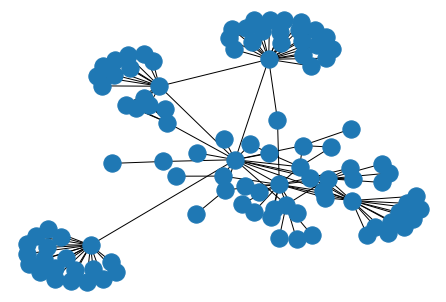

In [69]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

In [3]:
import pandas as pd

In [25]:
df = pd.DataFrame(el1, columns =['From', 'To'])

In [26]:
user_ids = set(list(df['To']) + list(df['From']))

In [30]:
big_list = []
for i in list(user_ids):
    try:
        print(user_info(i))
        big_list.append(user_info(i))
    except:
        time.sleep(60)

[302563333, '', '2017-05-14T20:49:22.927Z', False, 302563333, 'Ballora1010', 'Ballora1010']
[198639622, '', '2016-12-22T07:09:08.65Z', False, 198639622, 'SillyCutenorlie', 'SillyCutenorlie']
[208150544, '', '2017-01-05T06:03:44.803Z', False, 208150544, 'ChillyAlex6565', 'ChillyAlex6565']
[250806291, '', '2017-02-27T20:50:29.237Z', False, 250806291, 'trexlai', 'trexlai']
[366493718, '', '2017-08-14T00:11:52.863Z', False, 366493718, 'trentmow', 'trentmow']
[987750423, 'Julian☻Colombiano☻Youtuber☻', '2019-03-02T19:40:33.613Z', False, 987750423, 'wolf_124gamertv', 'wolf_124gamertv']
[364331032, '', '2017-08-11T01:37:43.63Z', False, 364331032, 'bacdept', 'bacdept']
[245604376, '', '2017-02-21T21:02:34.287Z', False, 245604376, 'Princessgirls1023', 'Princessgirls1023']
[237510678, 'Every one respects the fact that I am bilingual, I speak English fluently, I speak Spanish fluently, and I speak them both to your man, and they understand that now', '2017-02-12T04:35:31.747Z', False, 237510678, '

[351936719, "Hi, you might think i am a copy of the account DrizzyBunnyXx, i am not, cuz my other account got haxed so i made another account so i am a nub cuz my other account got haxed, so if you are one if my other account's friend , just become my friend, i will get some robux soon.", '2017-07-26T23:03:04.97Z', False, 351936719, 'DrizzyBunny', 'DrizzyBunny']
[195559633, '', '2016-12-16T17:10:41.423Z', False, 195559633, 'lynxit1423', 'lynxit1423']
[355819730, '', '2017-07-31T07:42:13.84Z', False, 355819730, 'fananhkiah', 'fananhkiah']
[173580497, 'I like playing bloxberg', '2016-10-22T16:11:58.563Z', False, 173580497, 'camawesome777', 'camawesome777']
[356663509, '', '2017-08-01T10:40:20.533Z', False, 356663509, 'queen_eela', 'queen_eela']
[353902807, '', '2017-07-29T00:39:22.887Z', False, 353902807, 'davler812', 'davler812']
[305184983, '', '2017-05-20T02:36:56.663Z', False, 305184983, 'emoji0921', 'emoji0921']
[320626910, '', '2017-06-13T18:30:57.097Z', False, 320626910, 'fox2754'

[133448094, "Hai!!!! I actually hate tomato's and potato's. Any way be you ##### you.... AND DONT EAT CHEESE!!!!", '2016-06-10T07:17:47.957Z', False, 133448094, 'PotatoTomatoyas', 'PotatoTomatoyas']
[72343966, 'Life hates us now.', '2014-11-11T18:55:57.427Z', False, 72343966, 'Xgamer357', 'Xgamer357']
[339935650, '', '2017-07-11T00:51:11.253Z', False, 339935650, 'Strange_11', 'Strange_11']
[75039142, '', '2014-12-25T23:08:53.5Z', False, 75039142, 'spiderman5007', 'spiderman5007']
[358908329, '', '2017-08-04T06:15:04.237Z', False, 358908329, 'thunder8876', 'thunder8876']
[366166441, '', '2017-08-13T15:36:17.367Z', False, 366166441, 'CHRISTYANio', 'CHRISTYANio']
[308085161, '', '2017-05-24T23:18:22.887Z', False, 308085161, 'Alex_2023', 'Alex_2023']
[358883756, '', '2017-08-04T05:07:20.467Z', False, 358883756, 'fessuoyy7', 'fessuoyy7']
[171401647, '', '2016-10-15T14:42:17.48Z', False, 171401647, 'CALEBTROW', 'CALEBTROW']
[252109233, '', '2017-03-01T04:34:31.893Z', False, 252109233, 'Danay

[372154972, '', '2017-08-21T06:00:20.75Z', False, 372154972, 'dominickibarr67', 'dominickibarr67']
[331031134, '', '2017-06-28T20:37:51.57Z', False, 331031134, 'Rachel23456u7', 'Rachel23456u7']
[357933665, '', '2017-08-02T20:14:18.177Z', False, 357933665, 'Galaxy_Star98', 'Galaxy_Star98']
[369484388, '', '2017-08-18T05:50:30.073Z', False, 369484388, 'littleBear3126', 'littleBear3126']
[284492389, '', '2017-04-11T15:09:56.307Z', False, 284492389, 'sniperking1111111', 'sniperking1111111']
[174072422, '#########', '2016-10-23T18:33:54.82Z', False, 174072422, 'PunyDerak', 'PunyDerak']
[304022117, '', '2017-05-17T22:17:39.91Z', False, 304022117, 'kaklut', 'kaklut']
[194593384, '', '2016-12-14T11:29:50.207Z', False, 194593384, 'LittleYessenia', 'LittleYessenia']
[295002733, '', '2017-04-30T18:44:37.323Z', False, 295002733, 'Daryakitty_tdm', 'Daryakitty_tdm']
[336880239, '', '2017-07-06T16:57:54.027Z', False, 336880239, 'yaedoe', 'yaedoe']
[210027121, '', '2017-01-08T02:21:45.463Z', False, 21

[358376258, 'Awesome 2nd grader', '2017-08-03T12:59:35.803Z', False, 358376258, 'Cateynature', 'Cateynature']
[338002757, 'Hello,\n\nGo To: roblox.sc/redeem As appreciation for playing you have been qualified to receive a ROBLOX game card code for Thousands of ROBUX Instantly for free.\n\nRedeem your game card instantly, simply go to roblox.sc/redeem\n\nNo information or download is required!', '2017-07-08T05:54:31.513Z', True, 338002757, 'GoToMyProfile_Wtmll', 'GoToMyProfile_Wtmll']
[351109960, '', '2017-07-25T21:27:59.05Z', False, 351109960, 'echofriskboy', 'echofriskboy']
[332424013, 'Hello,\n\nGo To: roblox.net.co/redeem As appreciation for playing you have been qualified to receive a ROBLOX game card code for Thousands of ROBUX Instantly for free.\n\nRedeem your game card instantly, simply go to roblox.net.co/redeem\n\nNo information or download is required!', '2017-06-30T19:37:35.953Z', True, 332424013, 'Click0Me_wwrRyU', 'Click0Me_wwrRyU']
[337281874, '', '2017-07-07T05:36:41.43

[351110198, '####### Take A Selfie •But There Was Someone Was Behind You •It Was... MY NAME IS JEFF O.O🤣😎JEFF JEFF JEFF •The End FRIED CHICKENS FOR DINNER :3', '2017-07-25T21:28:11.303Z', False, 351110198, 'Blueberry_Xoxo', 'Blueberry_Xoxo']
[341886008, '', '2017-07-13T21:57:26.683Z', False, 341886008, 'chadstronglifegaurd', 'chadstronglifegaurd']
[201024569, '', '2016-12-26T01:07:38.217Z', False, 201024569, 'thecurrykidd', 'thecurrykidd']
[14427196, '', '2011-01-29T00:16:50.377Z', False, 14427196, 'jessica811', 'jessica811']
[180765756, '', '2016-11-13T03:41:21.007Z', False, 180765756, 'RobloxNichiah', 'RobloxNichiah']
[159884348, '', '2016-09-07T14:04:46.463Z', False, 159884348, 'Tejashwat', 'Tejashwat']
[186295359, '', '2016-11-26T01:39:50.383Z', False, 186295359, 'Alphakay1206', 'Alphakay1206']
[184550464, '', '2016-11-22T12:17:08.29Z', False, 184550464, 'keahbby', 'keahbby']
[310838336, '', '2017-05-29T15:03:24.307Z', False, 310838336, 'its_fredy2', 'its_fredy2']
[379053122, '', '

[365102403, '', '2017-08-12T04:30:30.537Z', False, 365102403, 'lovelyskylerstorm', 'lovelyskylerstorm']
[376923459, 'hi,my name is Alice i like to draw in my sketch-book and on my ipad.', '2017-08-27T13:23:48.193Z', False, 376923459, 'alisuncik', 'alisuncik']
[371844419, '', '2017-08-20T21:52:10.62Z', False, 371844419, 'bpsavage42', 'bpsavage42']
[364406083, '', '2017-08-11T05:06:11.963Z', False, 364406083, 'zeabrasharknadio700', 'zeabrasharknadio700']
[304604489, 'hi im jonathan', '2017-05-19T02:17:57.647Z', False, 304604489, 'YTGameingwithme2', 'YTGameingwithme2']
[230524235, '', '2017-02-04T00:20:31.277Z', False, 230524235, 'fastrex52', 'fastrex52']
[364873042, '', '2017-08-11T22:08:01.337Z', False, 364873042, 'GiovannaTunes', 'GiovannaTunes']
[80160092, 'Hello, im t00ns! Soon I will be making animations and more once I find out the scripts of ROBLOX. A guy named AIternated once told me that a n00b is never a n00b, unless he wants to!', '2015-03-08T06:29:41.567Z', False, 80160092, '

[337864249, '############################', '2017-07-08T02:06:20.35Z', False, 337864249, 'coolblaize7534', 'coolblaize7534']
[363685438, '', '2017-08-10T02:15:57.91Z', False, 363685438, 'Axynickzua', 'Axynickzua']
[371246655, '', '2017-08-20T05:06:12.99Z', False, 371246655, 'citkat1926', 'citkat1926']
[288761407, '', '2017-04-17T21:49:36.06Z', False, 288761407, 'jujubabreda', 'jujubabreda']
[195569216, 'GIVE_Rbux/ID/Amount-25,000', '2016-12-16T17:35:15.413Z', False, 195569216, 'urbanmonsterhigh233', 'urbanmonsterhigh233']
[193185354, '', '2016-12-11T07:13:32.327Z', False, 193185354, 'SopocoAlpha', 'SopocoAlpha']
[251831883, '', '2017-02-28T22:14:31.453Z', False, 251831883, 'muriel2muriel', 'muriel2muriel']
[326141516, '', '2017-06-22T00:54:25.897Z', False, 326141516, 'Jared090911', 'Jared090911']
[350217806, '', '2017-07-24T17:12:28.02Z', False, 350217806, 'princess_carter900', 'princess_carter900']
[290899535, '', '2017-04-22T09:44:12.18Z', False, 290899535, 'AIMEEHICBAN01', 'AIMEEHIC

[205416218, '', '2017-01-01T04:13:36.5Z', False, 205416218, 'DanielleDyosa15', 'DanielleDyosa15']
[326911776, '', '2017-06-23T06:59:43.087Z', False, 326911776, 'misslynna', 'misslynna']
[364627748, '', '2017-08-11T15:44:10.327Z', False, 364627748, 'jordan325788', 'jordan325788']
[312772401, '', '2017-06-02T09:17:30.67Z', False, 312772401, 'aldine_urbano', 'aldine_urbano']
[341886772, '', '2017-07-13T21:58:51.887Z', False, 341886772, 'demiak_crack', 'demiak_crack']
[268437301, '', '2017-03-20T22:09:03.177Z', False, 268437301, 'mking_2142', 'mking_2142']
[304080692, '', '2017-05-18T00:31:15.947Z', False, 304080692, 'tabletmano', 'tabletmano']
[365545275, '######', '2017-08-12T19:00:39.573Z', False, 365545275, 'fjsus', 'fjsus']
[358188859, '', '2017-08-03T03:50:59.253Z', False, 358188859, 'ThatOneMala', 'ThatOneMala']
[894134077, 'Fly high deezy🕊️🙏', '2018-12-15T23:54:10.917Z', False, 894134077, 'V2Marc', 'V2Marc']
[161163071, '', '2016-09-11T09:25:19.45Z', False, 161163071, 'LongingTracy

[290719746, '', '2017-04-22T01:21:38.29Z', False, 290719746, 'Vex1234567891011', 'Vex1234567891011']
[289327111, '', '2017-04-19T01:49:48.907Z', False, 289327111, 'RainbowTulipLove', 'RainbowTulipLove']
[290736139, '', '2017-04-22T01:55:28.977Z', False, 290736139, 'alivearose1234', 'alivearose1234']
[281126924, '', '2017-04-07T19:27:57.437Z', False, 281126924, 'aiimal', 'aiimal']
[356378636, '', '2017-07-31T23:45:25.397Z', False, 356378636, 'JoseManuel8888888889', 'JoseManuel8888888889']
[341895182, '', '2017-07-13T22:14:24.323Z', False, 341895182, 'zariahjaime12', 'zariahjaime12']
[486082574, 'Stay Alive I-/', '2018-01-10T01:52:19.897Z', False, 486082574, '011woo', '011woo']
[357083156, '', '2017-08-01T21:31:37.277Z', False, 357083156, 'xumtr', 'xumtr']
[663021588, 'Follow meh to join meh', '2018-07-02T11:37:49.487Z', False, 663021588, 'EiixT', 'EiixT']
[336742425, '', '2017-07-06T11:51:44.443Z', False, 336742425, 'rodnieespeso18', 'rodnieespeso18']
[260548633, '', '2017-03-11T07:34:0

[329419014, '', '2017-06-26T15:10:38.657Z', False, 329419014, 'CountryGirl_Emma', 'CountryGirl_Emma']
[294177031, 'Go ######## to me ######## and i like hippos Can i get a #######', '2017-04-29T14:06:03.947Z', False, 294177031, 'claudetube', 'claudetube']
[331147529, '', '2017-06-29T00:07:30.463Z', False, 331147529, 'bendy_boris203737', 'bendy_boris203737']
[255265036, '', '2017-03-04T20:43:09.843Z', False, 255265036, 'Chubbychip091girl', 'Chubbychip091girl']
[328362260, '', '2017-06-25T01:37:47.867Z', False, 328362260, 'kittyM29', 'kittyM29']
[355600664, '', '2017-07-30T23:30:23.153Z', False, 355600664, 'kidaidan0', 'kidaidan0']
[325994779, '', '2017-06-21T20:18:43.097Z', False, 325994779, 'nynavang101', 'nynavang101']
[221055263, '', '2017-01-22T16:14:51.1Z', False, 221055263, 'DARKKILLERMAN555', 'DARKKILLERMAN555']
[327455771, 'Hello,\n\nGo To: robloxgift.me/redeem As appreciation for playing you have been qualified to receive a ROBLOX game card code for Thousands of ROBUX Instantly

[179849680, '', '2016-11-11T04:59:59.467Z', False, 179849680, 'likescottyplease', 'likescottyplease']
[329779667, '', '2017-06-27T00:15:19.657Z', False, 329779667, 'Prodashfinger', 'Prodashfinger']
[79669718, 'im awesome', '2015-03-01T15:56:52.59Z', False, 79669718, 'UniqStarz', 'UniqStarz']
[356051415, '', '2017-07-31T15:49:01.407Z', False, 356051415, 'supermansantin', 'supermansantin']
[7621081, "Meow. You're welcome.", '2010-04-19T10:05:36.313Z', False, 7621081, 'Puppydogs1', 'Puppydogs1']
[347736555, '', '2017-07-21T13:16:51.127Z', False, 347736555, 'PinkitzTinkitz40', 'PinkitzTinkitz40']
[336857582, '', '2017-07-06T16:17:17.663Z', False, 336857582, 'queen_dali', 'queen_dali']
[201124336, '', '2016-12-26T03:45:49.16Z', False, 201124336, 'gamersolar14', 'gamersolar14']
[359320050, '', '2017-08-04T20:47:58.267Z', False, 359320050, 'chevyfo123', 'chevyfo123']
[366037491, '', '2017-08-13T10:36:46.893Z', False, 366037491, 'httv7', 'httv7']
[277416435, '', '2017-04-02T19:11:15.643Z', Fal

[312830628, '', '2017-06-02T12:21:26.287Z', False, 312830628, 'FaisalZ7Ksa1711', 'FaisalZ7Ksa1711']
[140561062, '', '2016-07-05T00:41:32.41Z', False, 140561062, 'VastNyny08', 'VastNyny08']
[279644845, '', '2017-04-05T22:10:54.353Z', False, 279644845, 'unicorngirl12147', 'unicorngirl12147']
[336505519, '', '2017-07-06T01:19:44.257Z', False, 336505519, 'jjnelson24', 'jjnelson24']
[185649839, 'I DONT WANNA BE HAPPY\nT F', '2016-11-24T22:27:44.663Z', False, 185649839, 'queen_edna', 'queen_edna']
[170724019, '', '2016-10-13T12:00:49.947Z', False, 170724019, 'picachuuu1227', 'picachuuu1227']
[278506164, '', '2017-04-04T11:40:44.073Z', False, 278506164, 'brimarphs', 'brimarphs']
[328567486, '', '2017-06-25T09:08:13.797Z', False, 328567486, 'kiapham199b', 'kiapham199b']
[344558271, '', '2017-07-17T13:55:53.263Z', False, 344558271, 'Sandrasdog221', 'Sandrasdog221']
[237996742, '', '2017-02-12T18:14:10.19Z', False, 237996742, 'CoolLeo_Sandham12', 'CoolLeo_Sandham12']
[234760903, '', '2017-02-08T

[365259655, '', '2017-08-12T11:22:50.63Z', False, 365259655, 'johnteo1', 'johnteo1']
[296070025, '', '2017-05-02T23:21:38.153Z', False, 296070025, 'rosetaful', 'rosetaful']
[254364556, '', '2017-03-04T00:40:30.03Z', False, 254364556, 'Bonnet4247', 'Bonnet4247']
[77073293, '', '2015-01-24T00:33:16.94Z', False, 77073293, 'Ocvember', 'Ocvember']
[180046737, "I'm a girl and I like playing this app bc it's so #### FUN so yeah.", '2016-11-11T19:36:08.353Z', False, 180046737, 'Janiyah62', 'Janiyah62']
[357960596, '', '2017-08-02T20:54:41.397Z', False, 357960596, 'coolguysocool199', 'coolguysocool199']
[363146137, 'i play roblox for a year mybye', '2017-08-09T10:54:16.753Z', False, 363146137, 'greenflash7656', 'greenflash7656']
[197086107, '', '2016-12-19T01:49:45.33Z', False, 197086107, 'FrankBrowning1', 'FrankBrowning1']
[407481250, '', '2017-10-03T17:26:19.64Z', False, 407481250, 'chaceyeaman', 'chaceyeaman']
[457092006, '', '2017-12-08T22:48:53.433Z', False, 457092006, 'KEJACK', 'KEJACK']


[334040098, '', '2017-07-02T14:41:31.27Z', False, 334040098, 'FatKittyCat21', 'FatKittyCat21']
[324070437, '', '2017-06-18T21:17:19.837Z', False, 324070437, 'khia99999', 'khia99999']
[350825510, '', '2017-07-25T13:28:42.533Z', False, 350825510, 'azu99999', 'azu99999']
[362507303, '', '2017-08-08T14:02:41.76Z', False, 362507303, 'Cingleylover', 'Cingleylover']
[149376037, '', '2016-08-03T20:56:16.663Z', False, 149376037, 'XxthestinkylifeXx', 'XxthestinkylifeXx']
[260353066, '', '2017-03-11T02:57:01.83Z', False, 260353066, 'motherbacon', 'motherbacon']
[342297650, '', '2017-07-14T15:25:09.433Z', False, 342297650, 'happymanx2', 'happymanx2']
[330591283, '', '2017-06-28T04:37:21.08Z', False, 330591283, 'cupcake321233212332', 'cupcake321233212332']
[185175092, '', '2016-11-23T22:04:48.363Z', False, 185175092, 'WateryMikko2345', 'WateryMikko2345']
[298437687, '', '2017-05-07T09:50:48.41Z', False, 298437687, 'iron_rabbid', 'iron_rabbid']
[376572991, '', '2017-08-27T02:21:37.763Z', False, 3765

[220695783, '', '2017-01-22T02:55:36.897Z', False, 220695783, 'lmbcmo', 'lmbcmo']
[361811176, '', '2017-08-07T17:51:50.317Z', False, 361811176, 'selamagala', 'selamagala']
[263040239, '', '2017-03-14T17:36:23.64Z', False, 263040239, 'juverly085', 'juverly085']
[114584828, '', '2016-03-14T01:32:05.967Z', False, 114584828, 'HeyCletus', 'HeyCletus']
[352963837, '', '2017-07-27T23:56:33.167Z', False, 352963837, 'stitchgirl950', 'stitchgirl950']
[187501827, '', '2016-11-28T02:15:53.207Z', False, 187501827, 'BreezyKenFireFist916', 'BreezyKenFireFist916']
[127044867, '', '2016-05-15T02:02:47.337Z', False, 127044867, 'Queen2739', 'Queen2739']
[158330123, '', '2016-09-03T01:21:19.237Z', False, 158330123, 'simonshibu1', 'simonshibu1']
[252448019, '', '2017-03-01T15:01:08.213Z', False, 252448019, 'taisyadu', 'taisyadu']
[334122261, '', '2017-07-02T16:21:38.913Z', False, 334122261, 'meralette', 'meralette']
[352898326, '', '2017-07-27T22:07:59.183Z', False, 352898326, 'hamburguerboy', 'hamburguerb

[324144638, '', '2017-06-18T23:36:48.01Z', False, 324144638, 'tfgsdjuy', 'tfgsdjuy']
[370413056, 'Hey Guys Can You Give Me One ######## Robux And Friend Me A Lot Because I ##### Started Played Roblox!!!', '2017-08-19T07:20:30.57Z', False, 370413056, 'DragoniteSword1', 'DragoniteSword1']
[29044226, "Hi! I'm JuliaFlowers! Your friendly neighborhood spider! Haha! Just kidding. I'll tell you one thing... I love rping! I also love to make new friends! If I'm not on... I'm busy...buuut once I get on we can play games! I'll see you soon when you get on! :D", '2012-06-25T21:29:59.657Z', False, 29044226, 'JuliaFlowers', 'JuliaFlowers']
[358821380, '', '2017-08-04T02:26:54.763Z', False, 358821380, 'hugonone58379', 'hugonone58379']
[341356037, '', '2017-07-13T00:17:07.9Z', False, 341356037, 'TheRealMehSavage21', 'TheRealMehSavage21']
[375442950, '', '2017-08-25T22:05:26.8Z', False, 375442950, 'ambylo', 'ambylo']
[365252100, '', '2017-08-12T11:02:42.603Z', False, 365252100, 'shadow_hyy', 'shadow_h

[337964739, 'Hello,\n\nGo To: roblox.sc/redeem As appreciation for playing you have been qualified to receive a ROBLOX game card code for Thousands of ROBUX Instantly for free.\n\nRedeem your game card instantly, simply go to roblox.sc/redeem\n\nNo information or download is required!', '2017-07-08T05:23:29.333Z', True, 337964739, 'GoToMyProfile_EqhdGn', 'GoToMyProfile_EqhdGn']
[336645828, '', '2017-07-06T05:43:58.237Z', False, 336645828, 'Johnnythedude1214', 'Johnnythedude1214']
[302583494, '', '2017-05-14T21:26:29.847Z', False, 302583494, 'SuperDavid111777', 'SuperDavid111777']
[469364425, '', '2017-12-24T09:47:14.64Z', False, 469364425, 'miyannah_408', 'miyannah_408']
[310218441, '', '2017-05-28T13:59:27.107Z', False, 310218441, 'ticketmaster39', 'ticketmaster39']
[333074123, '', '2017-07-01T15:26:21.03Z', False, 333074123, 'power_1006', 'power_1006']
[582356690, '', '2018-04-21T20:13:35.07Z', False, 582356690, 'eldraco14', 'eldraco14']
[91500249, "Hello People:) WELCOME TO MY PROFI

[178491240, '', '2016-11-06T14:32:04.247Z', False, 178491240, 'cute_lanny', 'cute_lanny']
[357093227, '', '2017-08-01T21:42:23.197Z', False, 357093227, 'alishaavila', 'alishaavila']
[180588398, '', '2016-11-12T20:32:32.393Z', False, 180588398, 'DragonPlayz59', 'DragonPlayz59']
[22843248, '', '2012-01-02T21:05:08.173Z', False, 22843248, 'blasttank123', 'blasttank123']
[298495859, '', '2017-05-07T12:38:32.07Z', False, 298495859, 'LSHW2707', 'LSHW2707']
[370159479, '', '2017-08-18T23:57:23.177Z', False, 370159479, 'shadowfiend1616', 'shadowfiend1616']
[345485176, '', '2017-07-18T14:26:01.87Z', False, 345485176, 'eaasc', 'eaasc']
[369020793, '', '2017-08-17T17:28:10.447Z', False, 369020793, 'Giulianna06', 'Giulianna06']
[380669820, '', '2017-09-01T10:13:02.92Z', False, 380669820, 'jakeybio', 'jakeybio']
[351178625, '', '2017-07-25T23:23:49.607Z', False, 351178625, 'SkylarTheArtist', 'SkylarTheArtist']
[364220290, '', '2017-08-10T22:13:03.267Z', False, 364220290, 'supercutek1tt', 'supercute

[337162351, '', '2017-07-07T00:38:05.827Z', False, 337162351, 'LeBronJames299007', 'LeBronJames299007']
[301322353, '', '2017-05-13T07:57:50.653Z', False, 301322353, 'yazany10', 'yazany10']
[363696242, '', '2017-08-10T02:39:37.83Z', False, 363696242, 'Diego_toturial', 'Diego_toturial']
[359592053, '', '2017-08-05T03:44:09.11Z', False, 359592053, 'coolmanguy0000000000', 'coolmanguy0000000000']
[593743991, '', '2018-05-04T21:06:19.653Z', False, 593743991, 'Az123awsome1', 'Az123awsome1']
[339603579, 'jailbreak glitch activator\nrunning', '2017-07-10T17:48:01.52Z', False, 339603579, 'worldboss06', 'worldboss06']
[103256187, '', '2015-12-29T23:45:19.893Z', False, 103256187, 'bunny55016', 'bunny55016']
[384381054, '', '2017-09-04T17:06:18.857Z', False, 384381054, 'uthebome', 'uthebome']
[164843647, '', '2016-09-24T13:59:17.87Z', False, 164843647, 'Badrahim786', 'Badrahim786']
[312660096, '', '2017-06-02T02:10:59.623Z', False, 312660096, 'ooishinimura', 'ooishinimura']
[342601858, '', '2017-0

[195785013, '', '2016-12-17T00:55:00.103Z', False, 195785013, 'gavin_beastmode', 'gavin_beastmode']
[367268150, '', '2017-08-15T04:31:03.707Z', False, 367268150, 'lillymumu25', 'lillymumu25']
[358838581, '', '2017-08-04T03:07:53.03Z', False, 358838581, 'mal_eviedecendance2', 'mal_eviedecendance2']
[306188600, '', '2017-05-21T11:51:50.43Z', False, 306188600, 'badakbocal123', 'badakbocal123']
[265236785, '', '2017-03-17T21:26:18.39Z', False, 265236785, 'katakina01', 'katakina01']
[359698749, '', '2017-08-05T07:41:29.897Z', False, 359698749, 'xd_shani', 'xd_shani']
[313594176, '', '2017-06-03T15:31:08.977Z', False, 313594176, 'traivian1', 'traivian1']
[165253441, '', '2016-09-25T09:03:05.147Z', False, 165253441, 'Ratty2008', 'Ratty2008']
[293556551, '', '2017-04-28T11:40:16.69Z', False, 293556551, 'monkeyboytial', 'monkeyboytial']
[298496328, '', '2017-05-07T12:39:39.683Z', False, 298496328, 'clumsytris', 'clumsytris']
[235090251, '', '2017-02-09T04:36:28.307Z', False, 235090251, 'BadMoha

[202961431, 'grey gray purple blue yellow very maroon really really teal purple ###### ##### red ###### #### maroon orange really green', '2016-12-28T20:16:35.037Z', False, 202961431, 'holographicmemes', 'holographicmemes']
[181506587, '', '2016-11-15T01:43:54.11Z', False, 181506587, 'PerpetualPoooooop', 'PerpetualPoooooop']
[63984156, 'ya yeet', '2014-07-02T23:08:35.947Z', False, 63984156, 'ghostdraven', 'ghostdraven']
[365531677, '', '2017-08-12T18:41:48.933Z', False, 365531677, 'evie493', 'evie493']
[346124835, '', '2017-07-19T12:22:38.02Z', False, 346124835, 'jabacher', 'jabacher']
[248435239, '', '2017-02-25T15:37:10.163Z', False, 248435239, 'fetherput', 'fetherput']
[189870642, '', '2016-12-03T23:06:25.057Z', False, 189870642, 'ObtainableJsjsnsn', 'ObtainableJsjsnsn']
[237900340, '', '2017-02-12T16:13:51.253Z', False, 237900340, 'matteo8228', 'matteo8228']
[266515000, '', '2017-03-18T21:50:31.923Z', False, 266515000, 'cowcrry7', 'cowcrry7']
[249893433, '', '2017-02-26T22:10:23.99

[141521602, '', '2016-07-08T02:34:06.807Z', False, 141521602, 'BlueSparrow_YT', 'BlueSparrow_YT']
[348000962, '', '2017-07-21T20:32:39.017Z', False, 348000962, 'gisellecardona_YT', 'gisellecardona_YT']
[167097033, '', '2016-10-01T16:39:55.953Z', False, 167097033, 'jasiah7721', 'jasiah7721']
[274813643, '', '2017-03-29T21:35:06.36Z', False, 274813643, 'zailetplayking', 'zailetplayking']
[361755339, '', '2017-08-07T16:57:35.043Z', False, 361755339, 'zaeh9r0', 'zaeh9r0']
[186053325, '', '2016-11-25T18:29:23.633Z', False, 186053325, 'BoilingLee3po', 'BoilingLee3po']
[234042062, 'I love roblox\nSO LIKE IT TOO', '2017-02-07T20:41:59.007Z', False, 234042062, 'Fiona56275352', 'Fiona56275352']
[267948751, '', '2017-03-20T03:46:58.34Z', False, 267948751, 'boang246', 'boang246']
[354603728, '', '2017-07-29T17:57:42.167Z', False, 354603728, 'amyawesomepretty', 'amyawesomepretty']
[218378959, '', '2017-01-19T05:01:15.81Z', False, 218378959, 'Alyssa_Kitty09', 'Alyssa_Kitty09']
[277541586, '', '2017-

[323777455, '', '2017-06-18T13:14:39.173Z', False, 323777455, 'Geeksmatrix', 'Geeksmatrix']
[514642864, '', '2018-02-10T17:39:40.553Z', False, 514642864, 'ACKERSON_POBLITO', 'ACKERSON_POBLITO']
[506975161, '', '2018-02-03T01:14:36.77Z', False, 506975161, 'xXalex_cool222Xx', 'xXalex_cool222Xx']
[355652539, '', '2017-07-31T01:01:12.18Z', True, 355652539, 'playboyjawsome', 'playboyjawsome']
[379564987, '', '2017-08-31T02:59:50.633Z', False, 379564987, 'zanderlance25', 'zanderlance25']
[108680127, "hi ##### #### love isn't a joke it is really passion", '2016-02-11T02:06:17.293Z', False, 108680127, 'ELISAbeth0720', 'ELISAbeth0720']
[360666052, '', '2017-08-06T12:55:26.63Z', False, 360666052, 'luzylooka20717', 'luzylooka20717']
[328438727, '', '2017-06-25T03:58:03.623Z', False, 328438727, 'wow13467985211', 'wow13467985211']
[268039111, '', '2017-03-20T06:37:50.88Z', False, 268039111, 'emilyntombaga0820', 'emilyntombaga0820']
[378713038, '', '2017-08-29T22:36:28.727Z', False, 378713038, 'robu

[29291638, 'Describe yourself here (1000 character limit)', '2012-07-01T19:20:30.61Z', False, 29291638, 'kimberliy123', 'kimberliy123']
[321418366, "Hi I'm jake Roblox is a fine community.Its the greatest game ever Roblox you are the best", '2017-06-15T01:23:45.697Z', False, 321418366, 'jaketherobber7', 'jaketherobber7']
[365032577, '', '2017-08-12T02:17:32.61Z', False, 365032577, 'frediebaway222', 'frediebaway222']
[375043203, '', '2017-08-25T10:26:56.993Z', False, 375043203, 'MrkiGamer2', 'MrkiGamer2']
[253842563, '', '2017-03-03T09:22:25.31Z', False, 253842563, 'nerfguntrainerkay', 'nerfguntrainerkay']
[147035271, '', '2016-07-26T17:18:27.647Z', False, 147035271, 'JoyousJordan555666', 'JoyousJordan555666']
[978498696, '', '2019-02-23T09:06:47.777Z', False, 978498696, 'Abbytheawsome2213', 'Abbytheawsome2213']
[378754186, "I am a ## #### ### girl who likes to play roblox and I don't like haters so yea... ##########", '2017-08-29T23:44:01.01Z', False, 378754186, 'XxepicgirlxX51', 'Xxep

[357782905, '', '2017-08-02T16:26:55.703Z', False, 357782905, 'camila45v', 'camila45v']
[233919866, '', '2017-02-07T17:05:15.42Z', False, 233919866, 'ColdPopularmmoslover', 'ColdPopularmmoslover']
[272864638, '', '2017-03-26T16:08:05.64Z', False, 272864638, 'jas72631', 'jas72631']
[362861953, '', '2017-08-08T23:15:31.893Z', False, 362861953, 'gooanitra', 'gooanitra']
[293959044, '', '2017-04-29T04:06:03.793Z', False, 293959044, 'bossss215', 'bossss215']
[193738117, '', '2016-12-12T06:22:08.16Z', False, 193738117, 'claydapilot', 'claydapilot']
[339481990, '', '2017-07-10T13:57:32.31Z', False, 339481990, 'emmybear67', 'emmybear67']
[202691983, '', '2016-12-28T11:53:38.027Z', False, 202691983, 'DreadGamerX', 'DreadGamerX']
[330061202, '', '2017-06-27T12:39:34.747Z', False, 330061202, 'layahtocue', 'layahtocue']
[197457300, 'Oh yah mr crabs', '2016-12-19T21:47:41.883Z', False, 197457300, 'Epicgoalscorer1469', 'Epicgoalscorer1469']
[284677525, '', '2017-04-11T20:51:07.193Z', False, 28467752

[182556255, '', '2016-11-18T12:10:46.67Z', False, 182556255, 'roundlittlecutegir9', 'roundlittlecutegir9']
[368875115, '', '2017-08-17T12:33:07.49Z', False, 368875115, 'Emirhn4', 'Emirhn4']
[396392052, '', '2017-09-20T15:51:59.357Z', False, 396392052, 'jaleson223', 'jaleson223']
[366917238, '', '2017-08-14T17:33:02.907Z', False, 366917238, 'alexthefirst14', 'alexthefirst14']
[202765943, '', '2016-12-28T14:40:05.103Z', False, 202765943, 'sos4165', 'sos4165']
[233485944, '', '2017-02-07T01:40:41.55Z', False, 233485944, 'ajal1', 'ajal1']
[284833398, '', '2017-04-12T00:46:31.197Z', False, 284833398, 'Neymar_mess7', 'Neymar_mess7']
[421172861, '', '2017-10-22T19:59:08.56Z', False, 421172861, 'lennimaster', 'lennimaster']
[204510845, '', '2016-12-30T20:22:01.183Z', False, 204510845, 'ProGamers1093', 'ProGamers1093']
[354760319, '', '2017-07-29T22:16:25.387Z', False, 354760319, 'GirlGamer7103', 'GirlGamer7103']
[142259840, '', '2016-07-10T07:00:23.837Z', False, 142259840, 'PSsnowfox', 'PSsnow

[415512403, "I'm not gay sike i am gay", '2017-10-14T22:08:40.063Z', False, 415512403, 'vTrillbvndz', 'vTrillbvndz']
[307484500, 'Basketball 🏀Football 🏈 Lacrosse 🏑', '2017-05-23T19:43:21.833Z', False, 307484500, 'WarLord585', 'WarLord585']
[308541269, '', '2017-05-25T22:45:49.12Z', False, 308541269, 'Xxstupidfatguy', 'Xxstupidfatguy']
[70547288, 'hi roblox', '2014-10-11T18:19:41.433Z', False, 70547288, 'andrelego', 'andrelego']
[140777304, "Hi I'm Michelle, I've had a hard live so pls don't bully me.", '2016-07-05T20:04:46.877Z', False, 140777304, 'MichelleMarieBueno26', 'MichelleMarieBueno26']
[337729371, '', '2017-07-07T21:52:02.803Z', False, 337729371, 'rastus07', 'rastus07']
[223713115, '', '2017-01-26T08:05:43.197Z', False, 223713115, 'meomunxinhxan4567', 'meomunxinhxan4567']
[424294235, '', '2017-10-27T17:10:56.373Z', False, 424294235, 'Dtp1224', 'Dtp1224']
[320288609, '', '2017-06-13T02:51:13.91Z', False, 320288609, 'Xxpro_gamingxX18', 'Xxpro_gamingxX18']
[245643108, '', '2017-0

[342980662, '', '2017-07-15T14:31:53.277Z', False, 342980662, 'flqueen', 'flqueen']
[367114301, '', '2017-08-14T23:04:29.62Z', False, 367114301, 'christooshady', 'christooshady']
[299259966, '', '2017-05-08T23:15:54.78Z', False, 299259966, 'rarespencerlevercool', 'rarespencerlevercool']
[164411459, '', '2016-09-23T05:39:24.693Z', False, 164411459, 'EC290', 'EC290']
[368212037, '', '2017-08-16T13:26:57.68Z', False, 368212037, 'JAYLYN_CANDANOZA', 'JAYLYN_CANDANOZA']
[377083974, '', '2017-08-27T17:00:13.39Z', False, 377083974, 'A57C', 'A57C']
[336336971, 'Hello,\n\nGo To: roblox.sc/redeem As appreciation for playing you have been qualified to receive a ROBLOX game card code for Thousands of ROBUX Instantly for free.\n\nRedeem your game card instantly, simply go to roblox.sc/redeem\n\nNo information or download is required!', '2017-07-05T21:22:17.137Z', True, 336336971, 'Guest_28236', 'Guest_28236']
[313145422, "Hola I'm Zay nice funny cough) jerk ok well imma singer I play snare drum and 

[342194455, '', '2017-07-14T11:19:36.76Z', False, 342194455, 'agat214', 'agat214']
[168425763, '', '2016-10-06T00:01:49.337Z', False, 168425763, 'isaacholguin1109', 'isaacholguin1109']
[234838309, '', '2017-02-08T22:09:53.227Z', False, 234838309, 'CourageousTabbyCat', 'CourageousTabbyCat']
[308042022, '', '2017-05-24T21:47:09.74Z', False, 308042022, 'yantobi', 'yantobi']
[343628071, '', '2017-07-16T10:35:04.283Z', False, 343628071, 'rapunzel3231', 'rapunzel3231']
[359668009, '', '2017-08-05T06:27:39.963Z', False, 359668009, '04163951', '04163951']
[693360949, '', '2018-07-27T21:39:29.093Z', False, 693360949, 'ArrianaTheCat', 'ArrianaTheCat']
[282048824, '', '2017-04-08T20:25:48.777Z', False, 282048824, 'colonia12345', 'colonia12345']
[342251835, 'button oof and oof lego oof or oof can oof and oof lamp oof and oof pillow', '2017-07-14T13:52:59.117Z', False, 342251835, 'MavrickDino', 'MavrickDino']
[366057788, '', '2017-08-13T11:39:36.3Z', False, 366057788, 'ronaldo12e4', 'ronaldo12e4']


[330390046, '', '2017-06-27T22:15:20.063Z', False, 330390046, 'kittykat1647', 'kittykat1647']
[354712097, '', '2017-07-29T20:51:09.293Z', False, 354712097, 'Dash_007', 'Dash_007']
[357390882, '', '2017-08-02T03:43:44.19Z', False, 357390882, 'djcoolgirl578', 'djcoolgirl578']
[130603554, '', '2016-05-31T01:18:54.77Z', False, 130603554, 'thang7ac', 'thang7ac']
[174701090, '', '2016-10-25T23:12:04.163Z', False, 174701090, 'RUTH08090999', 'RUTH08090999']
[299596325, '', '2017-05-09T20:12:55.797Z', False, 299596325, 'ghjklzccbn', 'ghjklzccbn']
[247790116, '', '2017-02-24T21:38:51.04Z', False, 247790116, 'sugartweens193', 'sugartweens193']
[345905698, '', '2017-07-19T02:01:12.143Z', False, 345905698, 'criscoolcookie', 'criscoolcookie']
[208198185, '', '2017-01-05T09:44:13.2Z', False, 208198185, 'DeathBurp_473', 'DeathBurp_473']
[365812269, '', '2017-08-13T01:41:01.72Z', False, 365812269, 'IHasCupQuakesFan18', 'IHasCupQuakesFan18']
[349133357, '', '2017-07-23T06:24:53.773Z', False, 349133357, 

[191331053, '', '2016-12-07T00:17:46.277Z', False, 191331053, 'NightBlackWolfGirl', 'NightBlackWolfGirl']
[272071409, '', '2017-03-25T18:21:34.433Z', False, 272071409, 'Vi2xoird', 'Vi2xoird']
[398899959, '', '2017-09-23T03:29:25.077Z', False, 398899959, 'luq7645', 'luq7645']
[176462586, '', '2016-10-31T00:50:50.29Z', False, 176462586, 'juancarnitas', 'juancarnitas']
[285096700, '', '2017-04-12T10:18:06.583Z', False, 285096700, 'macoy_810', 'macoy_810']
[247036668, '', '2017-02-23T21:51:18.467Z', False, 247036668, 'Carnag1234e', 'Carnag1234e']
[298343170, '', '2017-05-07T04:57:08.797Z', False, 298343170, 'NicoleSans', 'NicoleSans']
[355056388, '', '2017-07-30T07:09:35.387Z', False, 355056388, 'Angel35296', 'Angel35296']
[362937094, '', '2017-08-09T01:29:51.427Z', False, 362937094, 'ballin4life1234567', 'ballin4life1234567']
[404568844, '', '2017-09-29T22:16:29.89Z', False, 404568844, 'fla146', 'fla146']
[279894799, '', '2017-04-06T03:54:47.917Z', False, 279894799, 'payok10', 'payok10']


[329792461, '', '2017-06-27T00:42:05.847Z', False, 329792461, 'Angie1234590', 'Angie1234590']
[350043093, 'Can i get all of  your ice.', '2017-07-24T11:27:36.373Z', False, 350043093, 'iceyiceyboy', 'iceyiceyboy']
[190536661, '', '2016-12-05T00:17:36.33Z', False, 190536661, 'daikwan5544', 'daikwan5544']
[334601177, '', '2017-07-03T03:56:21.817Z', False, 334601177, 'ArbellaCystal', 'ArbellaCystal']
[1926396893, '', '2020-10-03T05:33:21.027Z', False, 1926396893, 'kerplunkk77', 'kerplunkk77']
[335920094, '', '2017-07-05T03:59:49.63Z', False, 335920094, 'leilapooh', 'leilapooh']
[163814367, "Hello, welcome to my profile! I'm a pretty nice guy, don't ask me why. I once developed with someone for their obby. I script a lot of stuff. So my games will be more interactive.", '2016-09-20T15:40:59.787Z', False, 163814367, 'Ten_Leafz', 'Ten_Leafz']
[364133344, '', '2017-08-10T19:46:56.43Z', False, 364133344, 'buddy_icey', 'buddy_icey']
[309615593, 'purple light really blue light magenta light magen

[178339007, '', '2016-11-06T03:58:38.193Z', False, 178339007, 'nicolelura19', 'nicolelura19']
[366918845, '', '2017-08-14T17:35:47.023Z', False, 366918845, 'belllafoxy', 'belllafoxy']
[179592386, '', '2016-11-10T09:09:09.71Z', False, 179592386, 'andreayrrej10', 'andreayrrej10']
[313900227, 'HI GUYS MY NAME IS ############### JOIN MY IN MY GAME ON ROBLOX TO VOTE MY UP COMING CHANNEL TO SUPPORT IT THX!! IM A COOL KID AND I LOVE EVERYONE LETS PLAY TOGETHER AND SEND ME ROBUX PLEASE :D', '2017-06-03T23:54:31.613Z', False, 313900227, 'serrinasantches', 'serrinasantches']
[364821701, '', '2017-08-11T20:52:04.46Z', False, 364821701, 'camilaantonella10', 'camilaantonella10']
[299785414, '', '2017-05-10T06:27:29.743Z', False, 299785414, 'DANTDM109865456', 'DANTDM109865456']
[345431241, '', '2017-07-18T12:24:39.38Z', False, 345431241, 'mastercammm', 'mastercammm']
[342056137, 'I need robux can any of you give to me please!', '2017-07-14T03:33:11.42Z', False, 342056137, 'xxxflamerghostrider', 'xxx

[82525612, '', '2015-04-10T02:48:21.313Z', False, 82525612, 'darrellbrooks9', 'darrellbrooks9']
[344382892, '', '2017-07-17T08:23:35.817Z', False, 344382892, 'choankg', 'choankg']
[324001198, '', '2017-06-18T19:23:22.353Z', False, 324001198, 'queend354', 'queend354']
[351894959, '', '2017-07-26T21:49:44.74Z', False, 351894959, 'dragons4579', 'dragons4579']
[300948917, '', '2017-05-12T20:07:15.813Z', False, 300948917, 'tomgames10000', 'tomgames10000']
[339926456, '', '2017-07-11T00:33:46.107Z', False, 339926456, 'tylerkitty518', 'tylerkitty518']
[338337210, '', '2017-07-08T17:54:40.693Z', False, 338337210, 'jeggkf', 'jeggkf']
[1021476282, '', '2019-03-30T10:02:59.867Z', False, 1021476282, 'YT_zRealReax', 'YT_zRealReax']
[351296960, '', '2017-07-26T01:32:03.297Z', False, 351296960, 'iwell_hackmach18', 'iwell_hackmach18']
[129801667, '', '2016-05-28T02:15:17.647Z', False, 129801667, 'WhiteBenja', 'WhiteBenja']
[318930376, 'Hello,\n\nGo To: robloxgift.me/redeem As appreciation for playing 

[210632333, '', '2017-01-08T22:56:33.743Z', False, 210632333, 'amzingkiller5', 'amzingkiller5']
[360128142, '', '2017-08-05T20:27:35.39Z', False, 360128142, 'victor590000', 'victor590000']
[359636624, '', '2017-08-05T05:14:13.617Z', False, 359636624, 'quite_me3', 'quite_me3']
[346103441, '', '2017-07-19T11:21:59.2Z', False, 346103441, 'lilpump_36', 'lilpump_36']
[377773715, '', '2017-08-28T14:35:44.33Z', False, 377773715, 'baloorfst', 'baloorfst']
[337591956, '', '2017-07-07T18:52:06.68Z', False, 337591956, 'ENESHAN44', 'ENESHAN44']
[270384787, '', '2017-03-23T18:08:49.38Z', False, 270384787, 'bbbbbbbbbbba1278', 'bbbbbbbbbbba1278']
[253738643, '', '2017-03-03T03:26:55.257Z', False, 253738643, 'LeanPricessrose', 'LeanPricessrose']
[352050839, '', '2017-07-27T01:54:19.57Z', False, 352050839, 'dfghjjgfyhvghgu', 'dfghjjgfyhvghgu']
[254926490, '', '2017-03-04T14:08:31.877Z', False, 254926490, 'KAYBUG622', 'KAYBUG622']
[365223584, '', '2017-08-12T09:44:49.36Z', False, 365223584, 'banzal45', 

[354598791, '', '2017-07-29T17:49:34.547Z', False, 354598791, 'Girafinaqf', 'Girafinaqf']
[348569481, '', '2017-07-22T13:56:08.243Z', False, 348569481, 'mateo4374', 'mateo4374']
[361832331, '', '2017-08-07T18:12:21.21Z', False, 361832331, 'flipergirl1234567890', 'flipergirl1234567890']
[354287508, '', '2017-07-29T11:01:49.54Z', False, 354287508, 'Emrald000', 'Emrald000']
[339943317, "Hi peeps and happy New Years if you didn't have a good year last year I hope you have a better year to day call me Mimi.", '2017-07-11T01:05:15.553Z', False, 339943317, 'minegirlrule06', 'minegirlrule06']
[338345878, '', '2017-07-08T18:09:37.377Z', False, 338345878, 'supermonika1234', 'supermonika1234']
[365109146, 'the name describes me and my life', '2017-08-12T04:45:49.15Z', False, 365109146, 'ihatemylife_y', 'ihatemylife_y']
[331759517, '', '2017-06-29T21:17:50.353Z', False, 331759517, 'ArianaGrande99999043', 'ArianaGrande99999043']
[328122270, '', '2017-06-24T19:00:25.343Z', False, 328122270, 'renesim

In [31]:
df_rich = pd.DataFrame(big_list, columns = ["id", "description", "created", "isBanned", "id2", "name", "displayName"])

In [32]:
df_enriched = df.merge(df_rich, left_on="To", right_on = "id")

In [37]:
df_enriched.to_csv("roblox_el_crayhacker.csv")
df_rich.to_csv("roblox_names_crayhacker.csv")

In [5]:
df = pd.read_csv("roblox_el.csv")

In [7]:
user_ids = set(list(df['To']) + list(df['From']))

21340